40 60
32


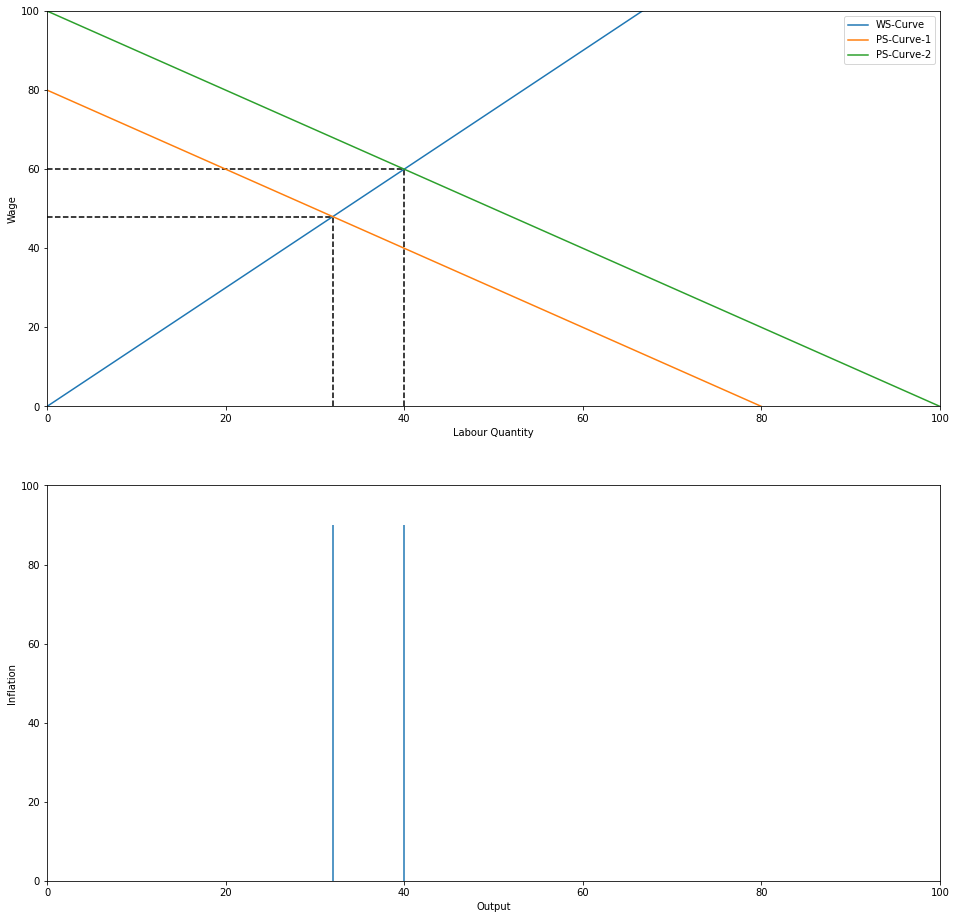

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math 
import random

#WS-PS Curve

def labour_supply_curve(gradient):
    wage_schedule = [] 
    for labour_amount in range(0,101):
        wage = gradient * labour_amount 
        wage_schedule.append(wage)
    return wage_schedule
    
#Wage setting curve is a markup on the labour supply curve 
def wage_setting_curve(gradient, bargaining_power):#not necessarily a parralel shift of the labour supply curve 
    wage_schedule = labour_supply_curve(gradient) 
    wage_setting_schedule = [] 
    for wage_val in wage_schedule:
        wage_setting_schedule.append(wage_val * bargaining_power)
    return wage_setting_schedule

#defined by the marginal product of labour - demand increases if worker productivity increases
def labour_demand_curve(labour_productivity, shock_term):
    wage_schedule = []
    y_intercept = 100
    for labour_amount in range(0,101):
        wage = -(labour_amount * labour_productivity) + y_intercept +shock_term
        wage_schedule.append(wage)
    return wage_schedule

#below the labour demand curve, real wage is below MPL due to firms' market power 
def price_setting_curve(labour_productivity, market_power, shock_term):
    wage_schedule = labour_demand_curve(labour_productivity, shock_term)
    price_setting_schedule = []
    for wage in wage_schedule:
        price_setting_schedule.append(wage-market_power)
    return price_setting_schedule 


gradient = 1 
bargaining_power = 1.5
market_power = 20
labour_productivity = 1
shock_term = 5




fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)


ax1.set_xlabel("Labour Quantity")
ax1.set_ylabel("Wage")
ax1.set_xlim(0,100)
ax1.set_ylim(0,100)


b = wage_setting_curve(gradient, bargaining_power)
ax1.plot(b,label='WS-Curve')
#remains constant

d = price_setting_curve(labour_productivity, market_power,0)
ax1.plot(d, label='PS-Curve-1')
#supply shock 
e = price_setting_curve(labour_productivity, market_power,20)
ax1.plot(e, label='PS-Curve-2')


ax1.legend()



for pos_b, val_b in enumerate(b):
    for pos_d, val_d in enumerate(d):
        if val_b == val_d and pos_b == pos_d:
            ax1.vlines(x = pos_d, ymin=0, ymax = val_d,color='black',linestyle='dashed')
            ax1.hlines(y = val_d, xmin= 0, xmax = pos_d,color='black',linestyle='dashed')
            imperfect_comp_labour_demand = pos_b
            imperfect_comp_wage = val_b

            
for pos_b, val_b in enumerate(b):
    for pos_e, val_e in enumerate(e):
        if val_b == val_e and pos_b == pos_e:
            ax1.vlines(x = pos_e, ymin=0, ymax = val_e ,color='black',linestyle='dashed')
            ax1.hlines(y = val_e, xmin=0, xmax = pos_e ,color='black',linestyle='dashed')
            print(pos_e, val_e)
            imperfect_comp_labour_demand2 = pos_e
            imperfect_comp_wage2 = val_e
 

ax2.set_xlabel("Output")
ax2.set_ylabel("Inflation")
ax2.set_xlim(0,100)
ax2.set_ylim(0,100)
print(imperfect_comp_labour_demand)


ax2.vlines(x=imperfect_comp_labour_demand, ymin=0, ymax=90)
ax2.vlines(x=imperfect_comp_labour_demand2, ymin=0, ymax=90)
plt.savefig("Diagrams/Question3")

plt.show()